# Data visulaization

In [1]:
# from IPython.core.interactiveshell import InteractiveShell # 모든 명령어 출력
# InteractiveShell.ast_node_interactivity = 'all'
# from IPython.core.display import display, HTML # 화면 좌우 크기 100%
# display(HTML("<style>.container { width:100% !important; }</style>"))
# import warnings # 파이썬 버전에 따른 오류 출력 방지
# warnings.filterwarnings('ignore')

import pandas as pd # pandas
import numpy as np # numphy
import matplotlib.pyplot as plt # 시각화 matplob
import seaborn as sns; sns.set() # 시각화 seaborn
# get_ipython().run_line_magic('matplotlib', 'inline') # 시각화 그림 자동 화면 출력
# plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 표시
# plt.rcParams['axes.unicode_minus'] = False  #한글 폰트 사용시 마이너스 폰트 깨짐 해결

## 1. Categorical variable (univariate)

In [2]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
object_columns = titanic.columns[titanic.dtypes == 'object']

In [5]:
for col in object_columns:
    titanic[col] = titanic[col].astype('category')

In [6]:
category_columns = titanic.columns[titanic.dtypes == 'category']
category_columns

Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')

In [7]:
def bar_plot(variable):
    var =titanic[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)

    plt.show()
    print("{}: \n {}".format(variable,varValue))

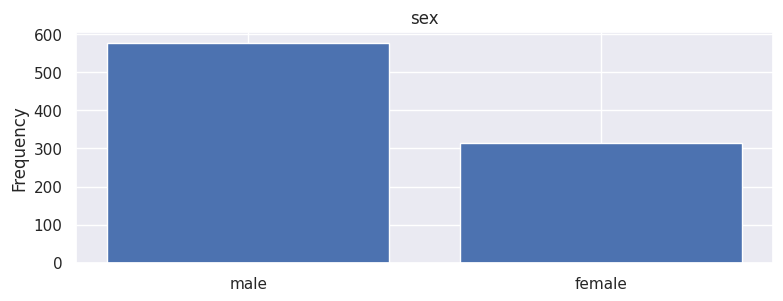

sex: 
 sex
male      577
female    314
Name: count, dtype: int64


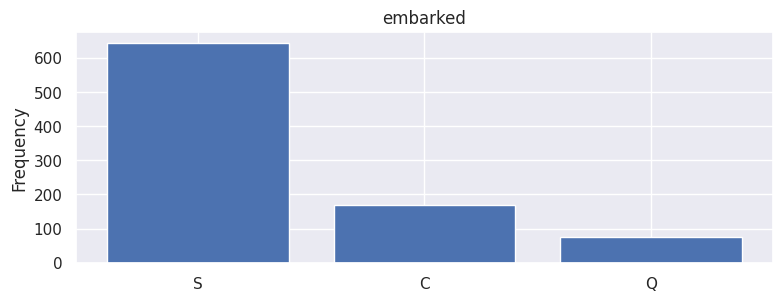

embarked: 
 embarked
S    644
C    168
Q     77
Name: count, dtype: int64


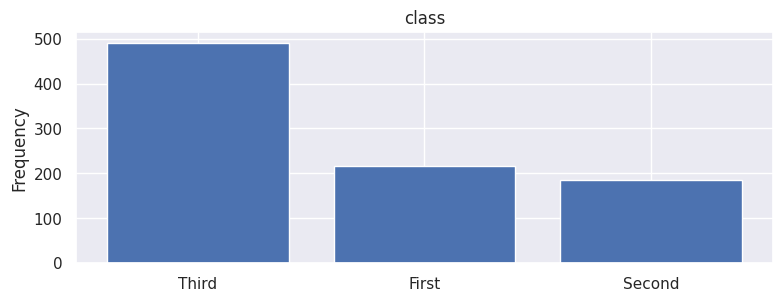

class: 
 class
Third     491
First     216
Second    184
Name: count, dtype: int64


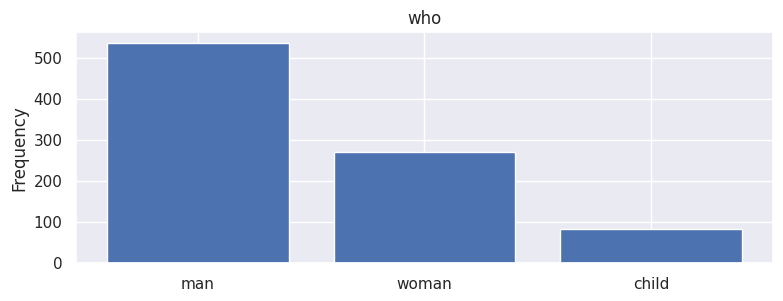

who: 
 who
man      537
woman    271
child     83
Name: count, dtype: int64


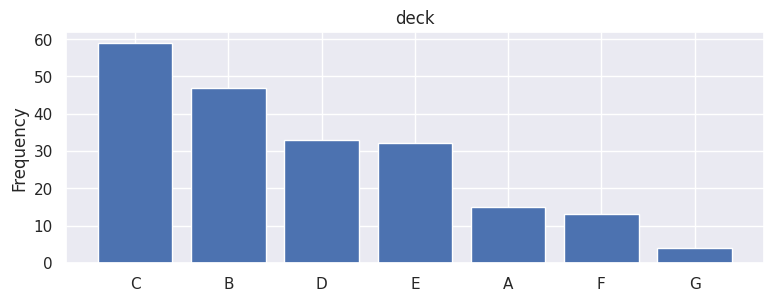

deck: 
 deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64


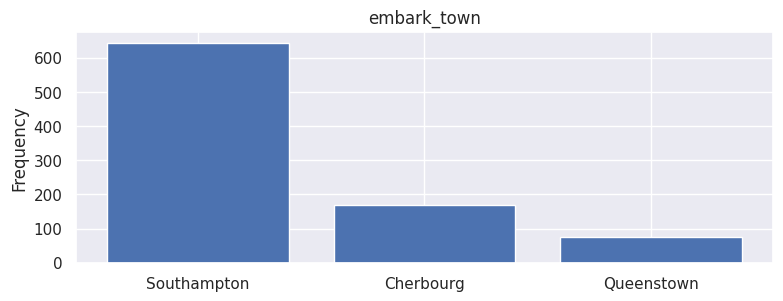

embark_town: 
 embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64


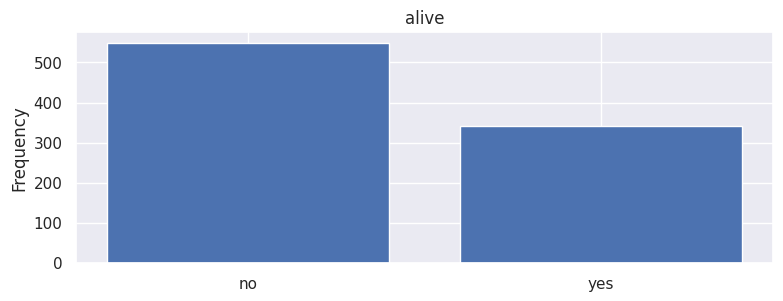

alive: 
 alive
no     549
yes    342
Name: count, dtype: int64


In [8]:
for c in category_columns:
    bar_plot(c)

## 2. Numerical variable (univariate)

In [9]:
from sklearn.datasets import fetch_california_housing
fetch_california_housing()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [10]:
df = fetch_california_housing()
df.feature_names.extend(df.target_names)
df = pd.DataFrame(np.c_[df.data, df.target], columns = df.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
df.columns[df.dtypes == 'float']

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [12]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(df[variable], bins=40)
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("{} distrubition with hist".format(variable))
    plt.show()

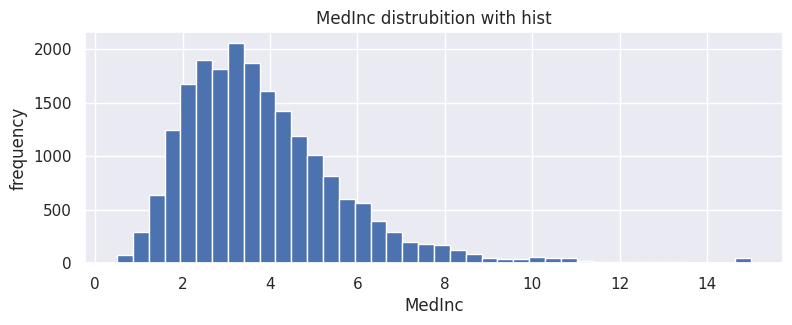

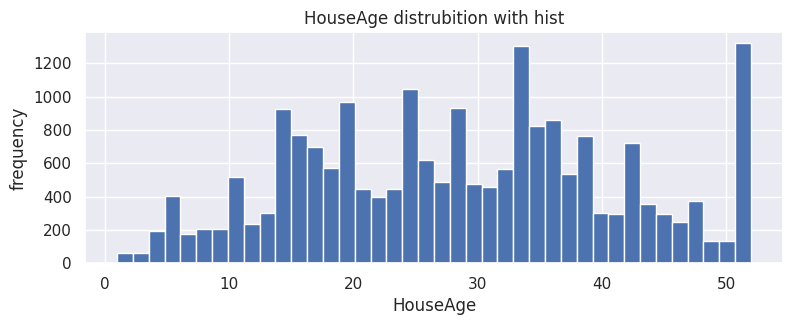

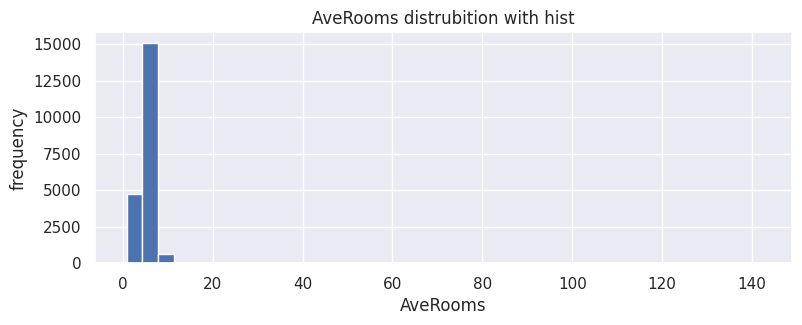

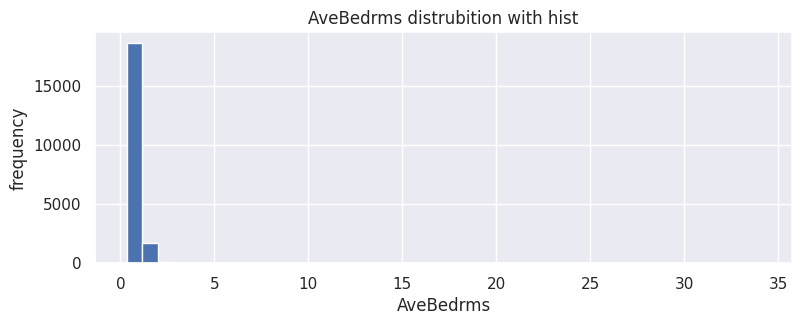

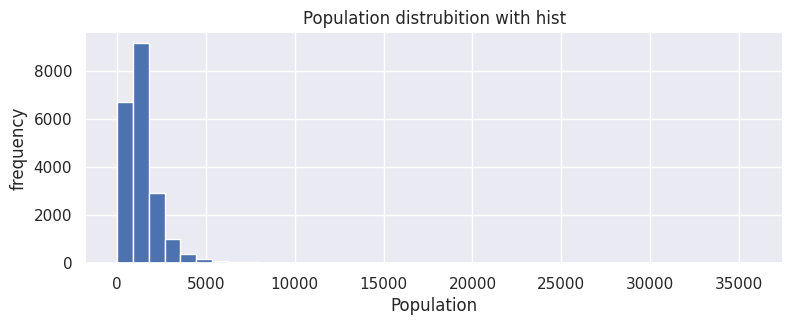

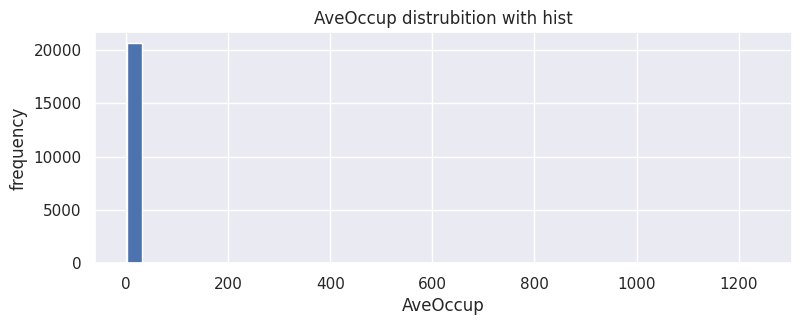

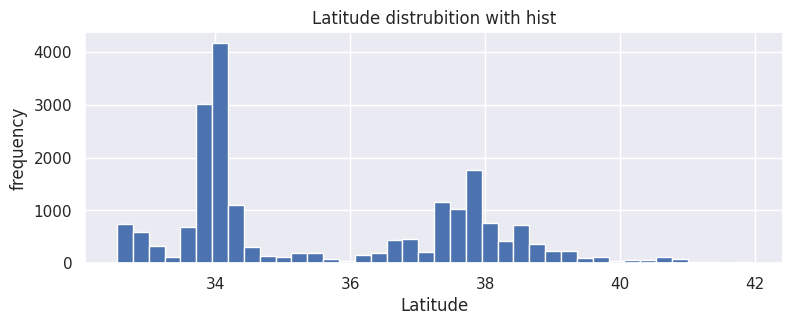

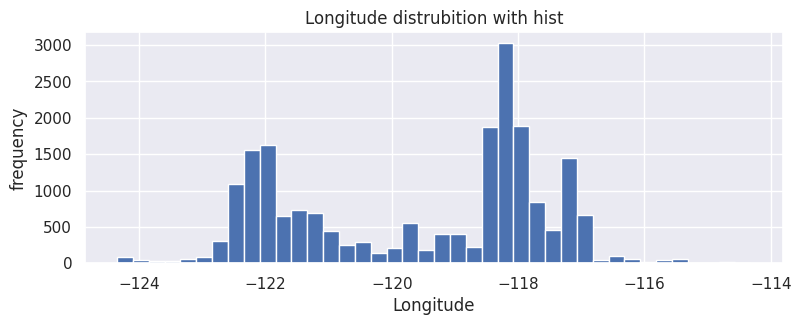

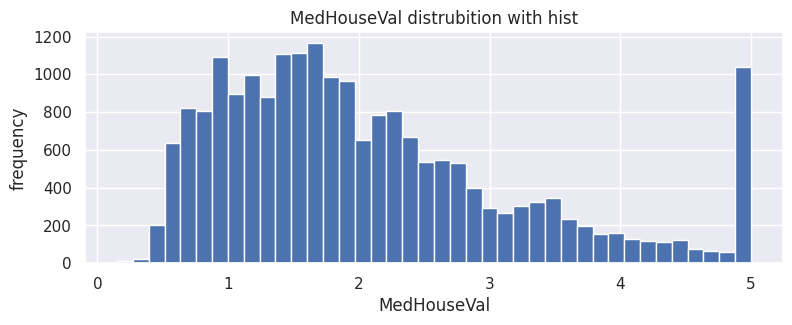

In [19]:
numericVar = ["age","trestbps","chol","thalach","oldpeak"]
for n in df.columns[df.dtypes == 'float']:
    plot_hist(n)

<Axes: xlabel='Longitude', ylabel='Latitude'>

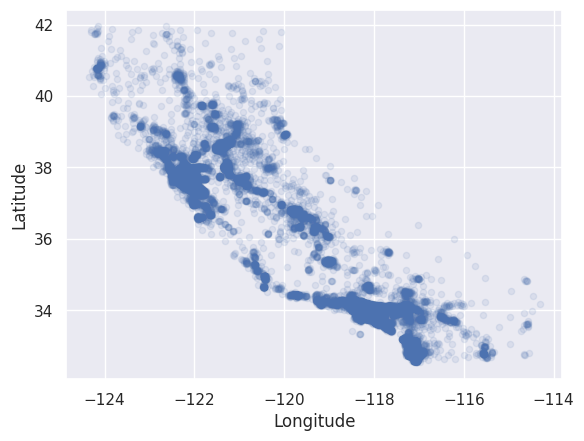

In [20]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1)

<Axes: xlabel='Longitude', ylabel='Latitude'>

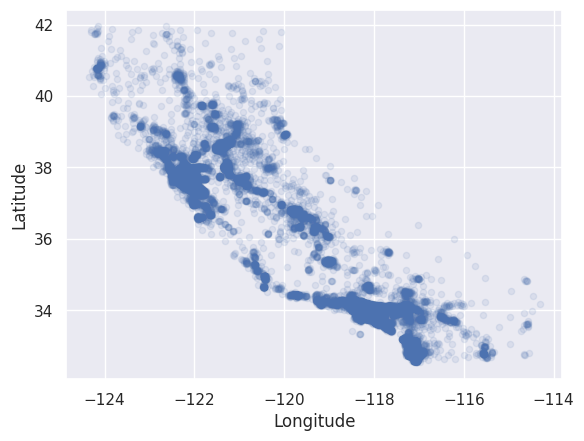

In [21]:
sns.set()
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1)

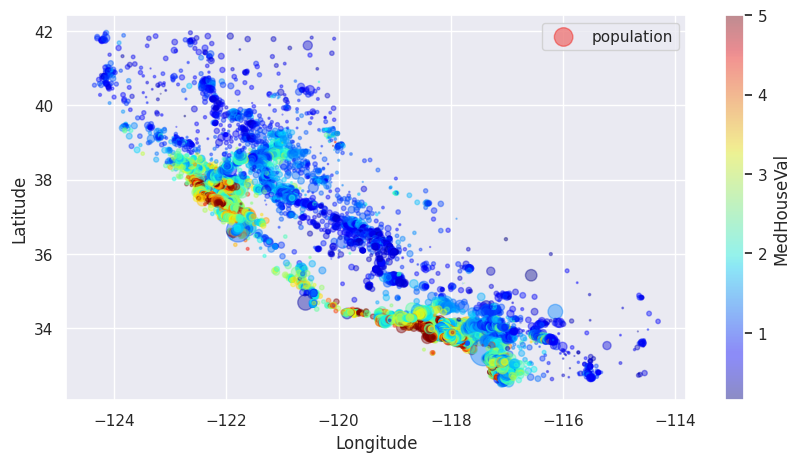

In [22]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
             s=df["Population"]/100, label="population", figsize=(10,5),
             c="MedHouseVal", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

## **Skweness 데이터를 log변환하여 정규분포화**
- 원본 데이터와 로그 변환된 데이터를 동시에 비교할 수 있게 두 개의 히스토그램으로 나타냅니다. 로그 변환을 통해 데이터가 더 정규분포에 가깝게 변형되었는지 확인할 수 있습니다. 완벽한 정규분포는 아니더라도, 로그 변환은 일반적으로 데이터의 왜곡을 줄이고, 통계적 분석이나 머신러닝 모델링에서 더 좋은 결과를 얻기 위해 데이터를 더 "정상적(normal-like)"으로 만드는 데 도움

Original Data Skewness: 1.2223590041061656
Log Transformed Data Skewness: -0.6507684095293165
Box-Cox Transformed Data Skewness: -0.03318680310471408


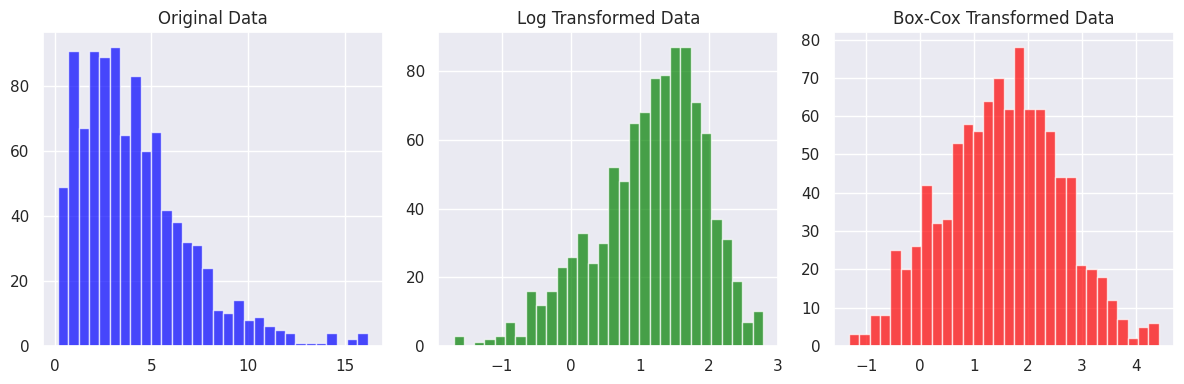

In [24]:
from scipy.stats import skew, boxcox
from scipy import stats

# 1. 왜도가 높은 데이터 생성
data = np.random.gamma(shape=2, scale=2, size=1000)
original_skewness = skew(data)
print(f"Original Data Skewness: {original_skewness}")

# 2. 로그 변환
log_data = np.log(data)
log_skewness = skew(log_data)
print(f"Log Transformed Data Skewness: {log_skewness}")

# 3. Box-Cox 변환
boxcox_data, _ = boxcox(data)
boxcox_skewness = skew(boxcox_data)
print(f"Box-Cox Transformed Data Skewness: {boxcox_skewness}")

# 4. 결과 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(data, bins=30, color='blue', alpha=0.7)
plt.title('Original Data')

plt.subplot(1, 3, 2)
plt.hist(log_data, bins=30, color='green', alpha=0.7)
plt.title('Log Transformed Data')

plt.subplot(1, 3, 3)
plt.hist(boxcox_data, bins=30, color='red', alpha=0.7)
plt.title('Box-Cox Transformed Data')

plt.tight_layout()
plt.show()
